In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
plt.rcParams['figure.figsize'] = (10,6)

In [23]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df = pd.read_csv("sales_cars.csv",index_col = 0,parse_dates = [0],date_parser = parser)
df.head()


,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


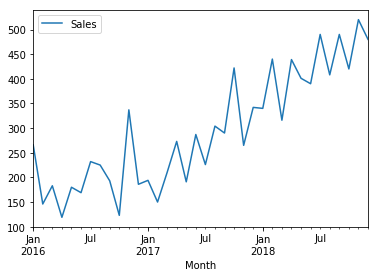

In [4]:
df.plot()

# Converting series to Stationary by Differencing

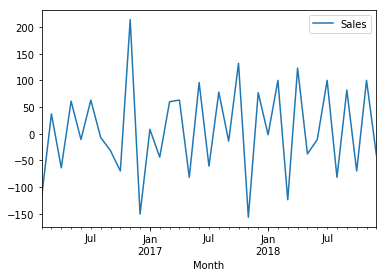

In [9]:
df_diff = df.diff(periods = 1) # diff in pandas # integrated order = 1 #Differencing
df_diff = df_diff[1:]
df_diff.plot()

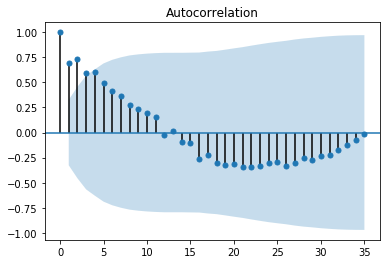

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(df)
plt.show()

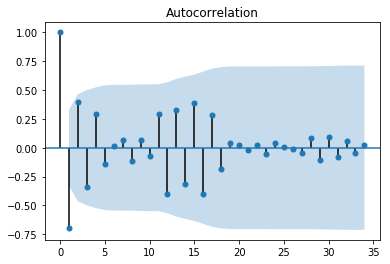

In [12]:
plot_acf(df_diff)
plt.show()

C:\Users\Vishwajeet Kumar\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


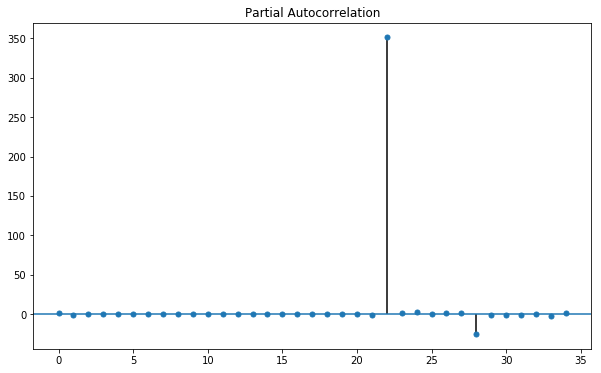

In [57]:
plot_pacf(df_diff)
plt.show()

In [22]:
X = df.values
train = X[:27]
test = X[27:]
predictions=[]
test.size

9

# Auto_Regressive Model(AR_Model)

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit  = model_ar.fit()

In [151]:
predictions = model_ar_fit.predict(start = 26,end=36)
predictions

array([348.46470112, 398.22922886, 368.27242294, 429.47485941,
       379.17750391, 431.35262347, 399.90234723, 433.3589338 ,
       418.74469463, 453.45711544, 429.65174489])

In [36]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

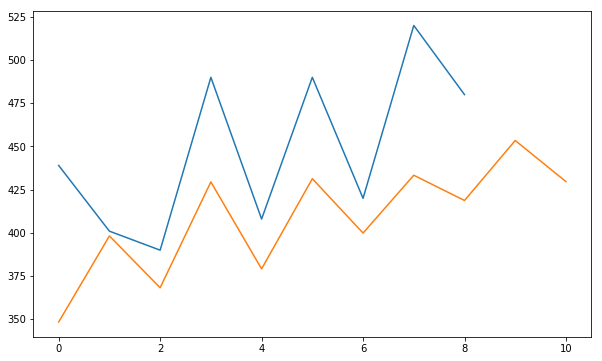

In [153]:
plt.plot(test)
plt.plot(predictions)

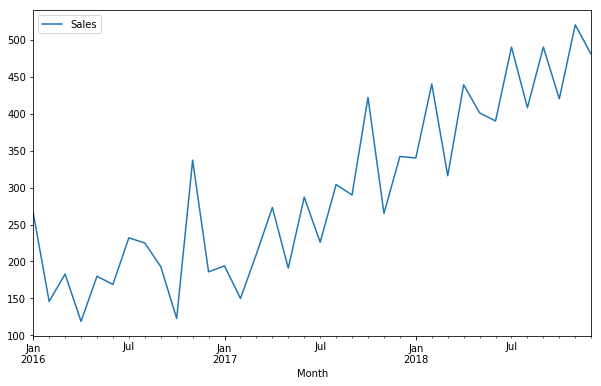

In [154]:
df.plot()

# Arima Model

In [155]:
from statsmodels.tsa.arima_model import ARIMA
#p,d,q ---p=priods take for auto regressive model
# d = integrated order
# q = periods in moving average
model_arima = ARIMA(train,order = (3,1,1))
model_arima_fit = model_arima.fit()
model_arima_fit.aic

295.9979353418423

In [156]:
predictions = model_arima_fit.forecast(steps = 9)[0]
predictions

array([388.10762048, 361.88628503, 431.54600187, 377.90918254,
       418.71340867, 398.84030981, 442.34736347, 420.19635656,
       447.08606056])

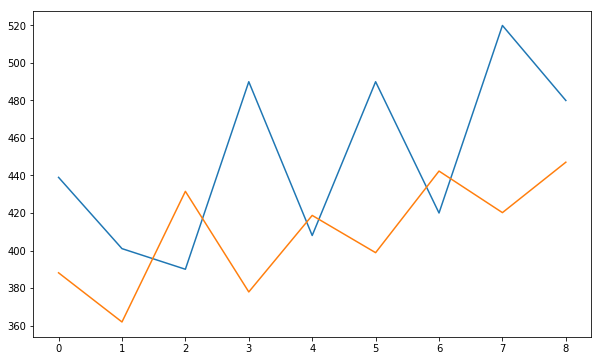

In [157]:
plt.plot(test)
plt.plot(predictions)

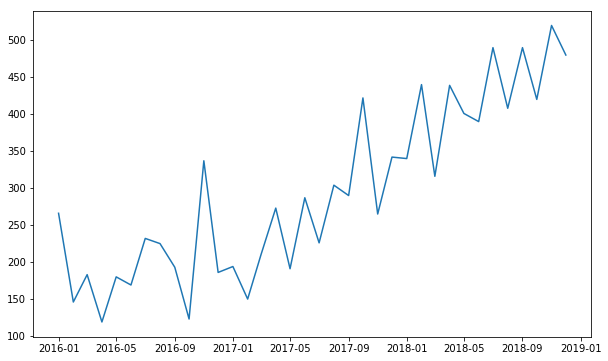

In [158]:
plt.plot(df)